# 1. Get the data ready


In [2]:
import numpy as np
import pandas as pd

heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create X (feature matrix)
# x = heart_disease.drop('target', axis=1)
x = heart_disease[['age', 'sex']]

# create y (labels)
y = heart_disease['target']
x

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0
...,...,...
298,57,0
299,45,1
300,68,1
301,57,1


# 2. Choose the right model and hyperparameters

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# we'll keep the default hyperparameters for simplicity
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 3 Fit the model to the data

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train

,age,sex
38,65,0
104,50,1
109,50,0
32,44,1
174,60,1
...,...,...
194,60,1
115,37,0
131,49,0
23,61,1


In [6]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
# make predictions
y_preds = clf.predict(x_test)

# 4 Evaluate the model

In [8]:
clf.score(x_train, y_train)

0.7272727272727273

In [9]:
clf.score(x_test, y_test)

0.639344262295082

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.58      0.67      0.62        27
           1       0.70      0.62      0.66        34

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.65      0.64      0.64        61



In [11]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[18,  9],
       [13, 21]])

In [12]:
# Try different numbers of estimators (trees)... (no cross-validation)
# np.random.seed(42)
# for i in range(100, 200, 10):
#     print(f"Trying model with {i} estimators...")
#     model = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
#     print(f"Model accuracy on test set: {model.score(x_test, y_test) * 100:.2f}%")
#     print("")

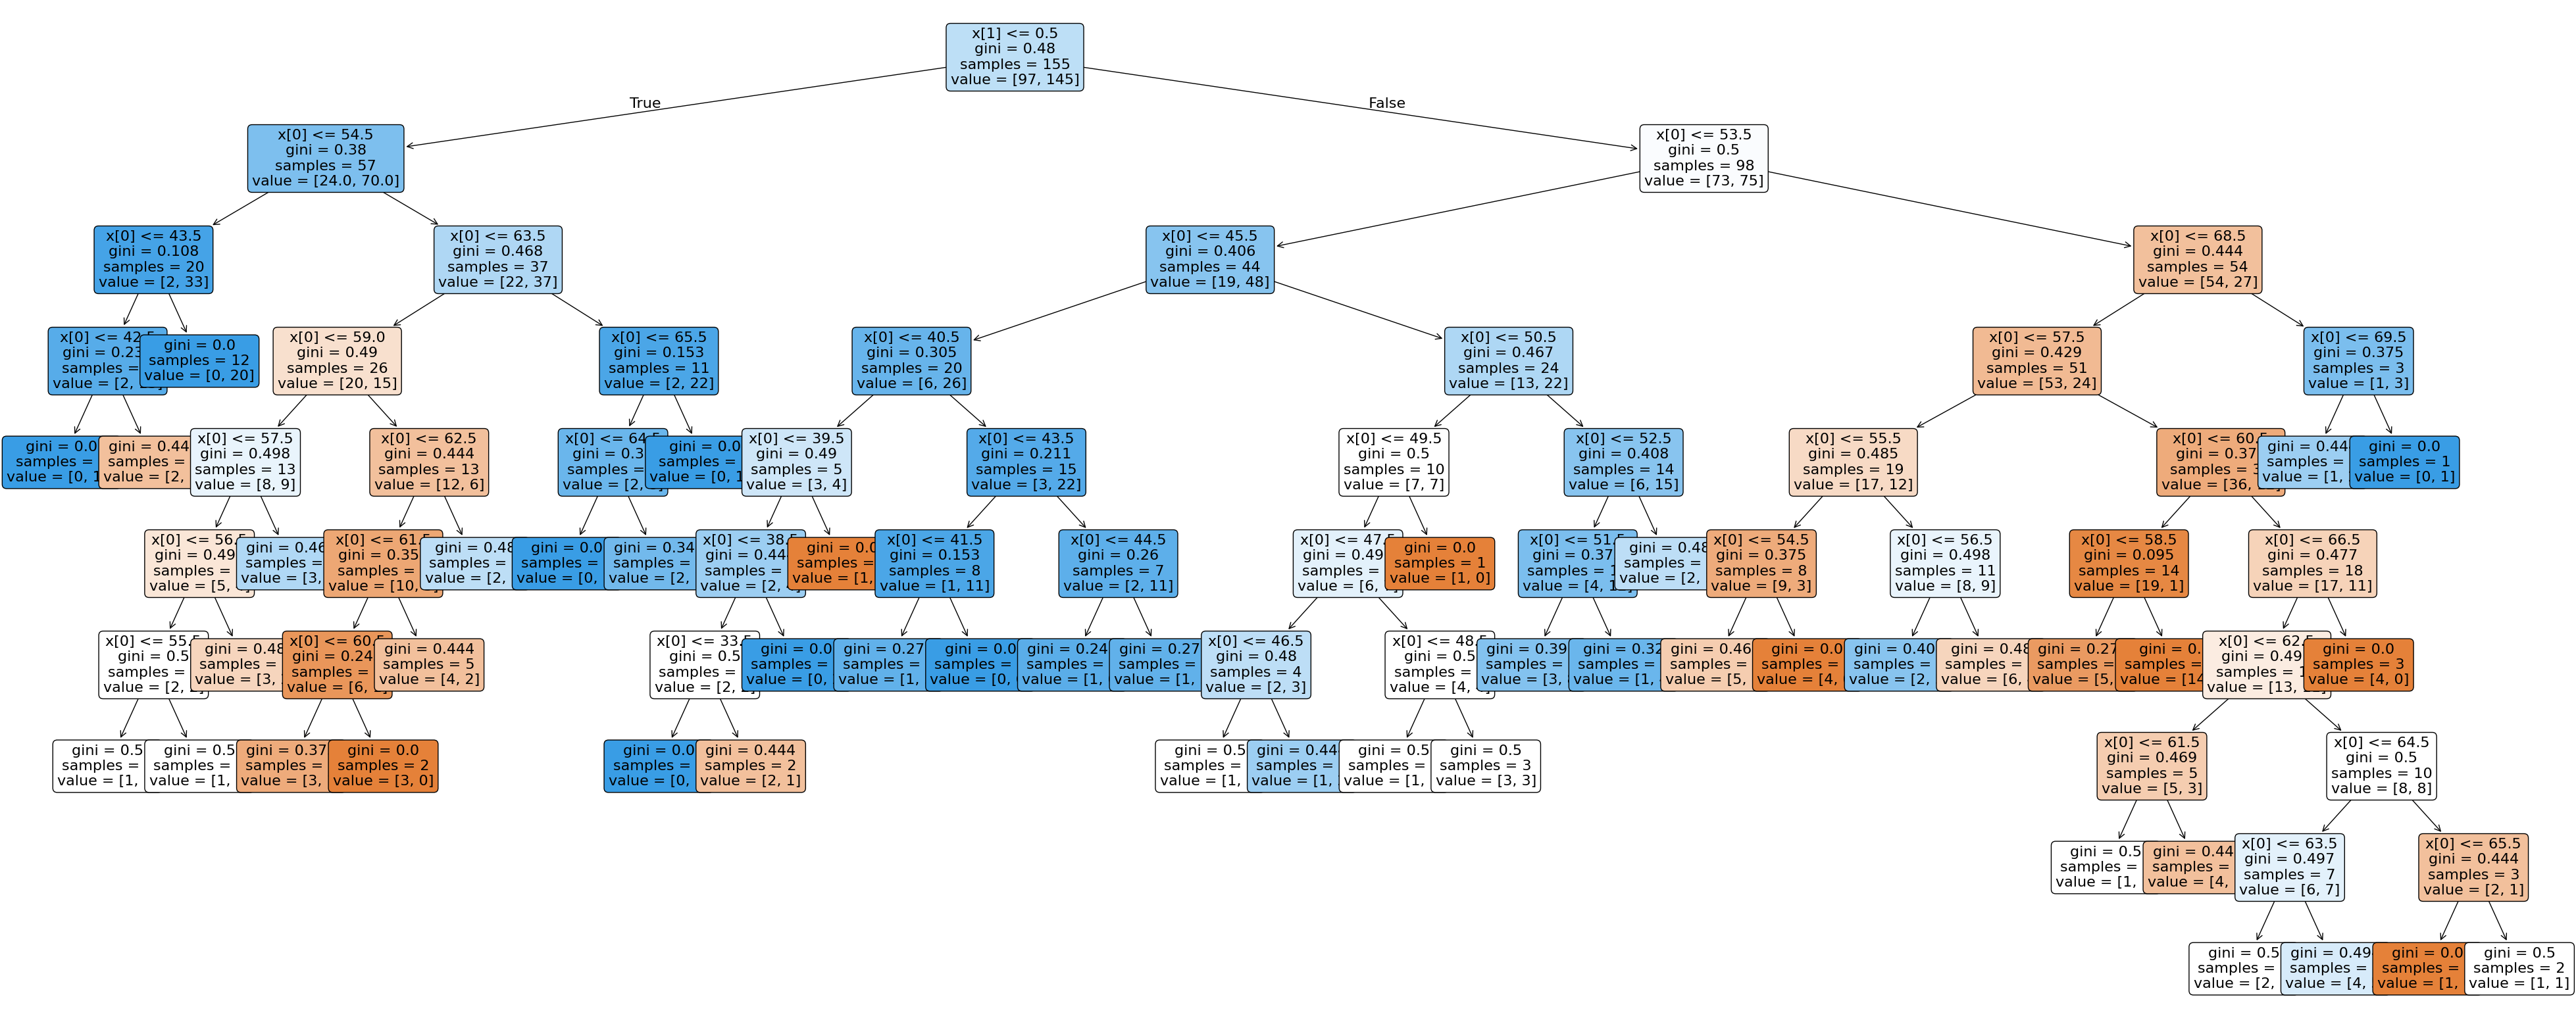

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,20))

# Plot the first tree in the forest
plot_tree(clf.estimators_[12],
          filled=True,
          rounded=True,
          fontsize=16)

# Save the plot (optional)
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()